In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
import opendatasets as od
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

In [6]:
try:
    os.makedirs("./data", exist_ok=True)
except FileExistsError:
    print("Directory already exists!")

In [7]:
# od.download("https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set/data", "./data")

In [8]:
column_names = ['buying_price', 'maint_cost', 'n_doors', 'n_person', 'lug_boot', 'safety', 'decision']

In [9]:
car_raw_df = pd.read_csv("./data/car-evaluation-data-set/car_evaluation.csv", header=0, sep=",")
car_raw_df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
car_raw_df.columns = column_names

In [11]:
car_raw_df.head(2)

,buying_price,maint_cost,n_doors,n_person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc


In [12]:
car_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying_price  1727 non-null   object
 1   maint_cost    1727 non-null   object
 2   n_doors       1727 non-null   object
 3   n_person      1727 non-null   object
 4   lug_boot      1727 non-null   object
 5   safety        1727 non-null   object
 6   decision      1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
car_raw_df.isna().sum() # There are no missing values.

buying_price    0
maint_cost      0
n_doors         0
n_person        0
lug_boot        0
safety          0
decision        0
dtype: int64

In [14]:
car_raw_df.dtypes

buying_price    object
maint_cost      object
n_doors         object
n_person        object
lug_boot        object
safety          object
decision        object
dtype: object

* There are 7 variables in our dataset. Every variable is a categorical datatype.
* Given by `buying price`, `mainteance cost`, `doors`, `people`, `size`, `safety`, and `class`.

In [15]:
car_raw_df.decision.value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

* `unacc` stands for Unacceptable, complete rejection of choice.
* `acc` stands for Acceptable,
* `good` stands for Good,
* `vgood` stands for Very Good.

---

### Training model

In [16]:
y = car_raw_df['decision']
X = car_raw_df.drop('decision', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying_price', 'maint_cost', 'n_doors', 'n_person', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test  = encoder.transform(X_test)

In [19]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [20]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Evaluating model

``Accuracy Score:``

$$
accuracy = \frac{TP + TN}{TP + TN + FP + FN} \cdot 100
$$

In [21]:
test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f"Accuracy of train data: {accuracy_score(y_train, train_pred):.5f}")
print(f"Accuracy of test data: {accuracy_score(y_test, test_pred):.5f}")

Accuracy of train data: 0.76738
Accuracy of test data: 0.80154


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred)
print(cm)

[[118   0   0   0]
 [ 17   0   0   0]
 [ 63   0 298   0]
 [ 23   0   0   0]]


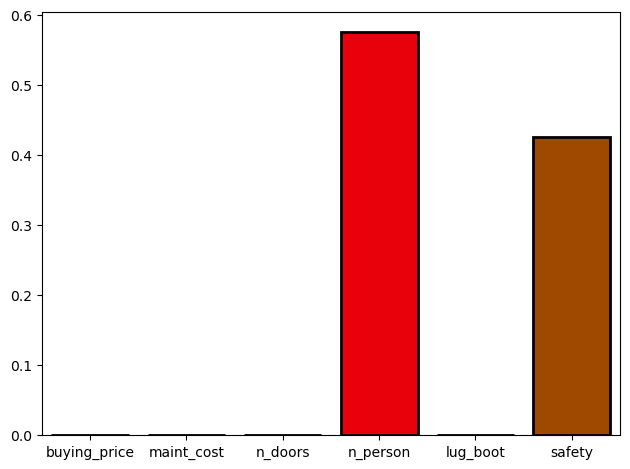

In [23]:
importances = tree.feature_importances_
features = X.columns
sns.barplot(x=features, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.tight_layout()
plt.show()

`n_person` and `safety` are the most important variables to predict a decision of buying a car. Decision tree is now limited to these described; hence, other variables `buying_price`, `maint_cost`, `n_doors`, and `lug_boot` will be swaped from <h>X</h>.

In [24]:
Xw = car_raw_df[['n_person', 'safety']]

In [25]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, y, random_state=42, test_size=0.3)

In [26]:
model = DecisionTreeClassifier(max_depth=2, random_state=0)
code_w = ce.OrdinalEncoder(cols=['n_person', 'safety'])
Xw_train = code_w.fit_transform(Xw_train)
Xw_test  = code_w.transform(Xw_test)

In [27]:
model.fit(Xw_train, yw_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [28]:
w_test_pred = model.predict(Xw_test)
w_train_pred = model.predict(Xw_train)
print(f"Accuracy of train data: {accuracy_score(yw_train, w_train_pred):.5f}")
print(f"Accuracy of test data: {accuracy_score(yw_test, w_test_pred):.5f}")

Accuracy of train data: 0.76738
Accuracy of test data: 0.80154


[[118   0   0   0]
 [ 17   0   0   0]
 [ 63   0 298   0]
 [ 23   0   0   0]]


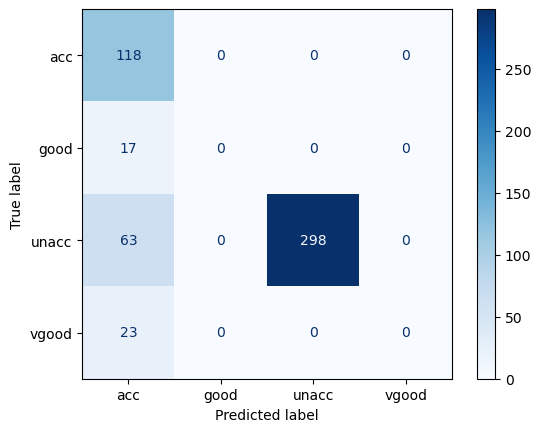

In [29]:
cmw = confusion_matrix(yw_test, w_test_pred)
print(cmw)
dispw = ConfusionMatrixDisplay.from_predictions(y_true=yw_test, y_pred=w_test_pred, cmap="Blues")

## Random Forest

In [30]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=42) #n_estimators is the number of decision trees created.

In [33]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [34]:
# Calculating predictions
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf  = rf.predict(X_test)

In [35]:
# Calculating performances
print(f"Accuracy score for train: {accuracy_score(y_train, y_pred_train_rf):.5f}")
print(f"Accuracy score for test: {accuracy_score(y_test, y_pred_test_rf):.5f}")

Accuracy score for train: 0.99752
Accuracy score for test: 0.87861


Studying the accuracy score in function of `n_estimators`: